## Load the Tweets Dataset

In [1]:
import nltk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 200)

# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import StratifiedKFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline

In [3]:
tweets = pd.read_pickle("cleaned_tweets_v1.pkl")
tweets.head()

,label,tweet,cleaned_tweets,cleaned_tweets_without_stopwords
0,1,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,1,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally transparant silicon case thanks uncle yay sony xperia sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,1,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,love this would you talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect
3,1,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,wired know george wa made that way iphone cute daventry home,wired know george way iphone cute daventry home
4,0,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk about question have unless pay them for their stupid support,amazing service apple talk question unless pay stupid support


In [4]:
tweets.shape

(7920, 4)

In [25]:
X = tweets['cleaned_tweets']
y = tweets['label']

# Set random seed for reproducibility
np.random.seed(1337)


In [26]:
import pickle
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from collections import Counter

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Create vocabulary from the training set using Counter
counter = Counter()
for tweet in X_train:
    counter.update(tweet.split())

# Save the vocabulary
vocab = set(counter.keys())

# Save vocabulary as pkl and txt files
with open('vocab.pkl', 'wb') as f:
    pickle.dump(vocab, f)

with open('vocab.txt', 'w') as f:
    for word in vocab:
        f.write(f"{word}\n")

In [28]:
# Display the size of the vocabulary and the top 10 tokens
print(f"Vocabulary size: {len(vocab)}")
print("Top 10 tokens:", counter.most_common(10))

Vocabulary size: 13464
Top 10 tokens: [('iphone', 3400), ('apple', 2289), ('the', 1592), ('samsung', 1098), ('and', 995), ('you', 914), ('new', 904), ('twitter', 890), ('for', 857), ('phone', 838)]


In [29]:
# Find the maximum length of tweets in the training set
max_length = max(len(tweet.split()) for tweet in X_train)
max_length

45

In [30]:
# Find the tweet with the maximum length
longest_tweet = max(X_train, key=lambda tweet: len(tweet.split()))
longest_tweet

'you know what apple suck that you cannot update the older ipads the newer io because there are many apps would love download but cannot because they are not compatible and are not forking out for new one when this one still good apple io'

In [31]:
# Pad the sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

# Shapes of the padded sequences
print("X_train_pad shape:", X_train_pad.shape)
print("X_test_pad shape:", X_test_pad.shape)


X_train_pad shape: (6336, 45)
X_test_pad shape: (1584, 45)


# Deep LEarning Models

In [33]:
from keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding, Dropout
from keras.layers import Conv1D, MaxPooling1D, LSTM
from keras.models import load_model

In [64]:
embedding_dim = 50
vocab_size = len(vocab)

In [157]:
# define the model
def define_CNN_model():

  model = Sequential()

  model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))

  model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
  model.add(MaxPooling1D(pool_size=2))

  model.add(Flatten())
  model.add(Dense(10, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))

  # compile network
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

In [158]:
CNN_model = define_CNN_model()

# summarize defined model
CNN_model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 45, 50)            673200    
                                                                 
 conv1d_8 (Conv1D)           (None, 38, 32)            12832     
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 19, 32)            0         
 g1D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 608)               0         
                                                                 
 dense_36 (Dense)            (None, 10)                6090      
                                                                 
 dropout_16 (Dropout)        (None, 10)                0         
                                                     

In [159]:
# %%capture
# !apt-get install -y graphviz
# !pip install pydot
# !pip install graphviz

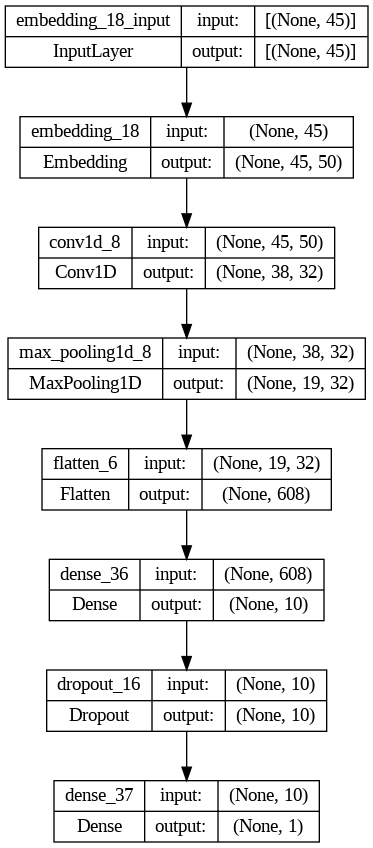

In [160]:
from IPython.display import Image
plot_model(CNN_model, to_file='CNN_model.png', show_shapes=True, show_layer_names=True)
Image(filename='CNN_model.png')

In [161]:
# fit network
CNN_model.fit(X_train_pad, y_train, epochs=5, batch_size=128, verbose=2, validation_split=0.1)

# save the model
CNN_model.save('CNN_model.h5')

Epoch 1/5
45/45 - 3s - loss: 0.5874 - accuracy: 0.7471 - val_loss: 0.5142 - val_accuracy: 0.7413 - 3s/epoch - 57ms/step
Epoch 2/5
45/45 - 2s - loss: 0.4192 - accuracy: 0.7618 - val_loss: 0.2940 - val_accuracy: 0.8833 - 2s/epoch - 37ms/step
Epoch 3/5
45/45 - 2s - loss: 0.2928 - accuracy: 0.8458 - val_loss: 0.2692 - val_accuracy: 0.8864 - 2s/epoch - 41ms/step
Epoch 4/5
45/45 - 1s - loss: 0.2496 - accuracy: 0.8702 - val_loss: 0.2749 - val_accuracy: 0.8849 - 1s/epoch - 32ms/step
Epoch 5/5
45/45 - 1s - loss: 0.2248 - accuracy: 0.8957 - val_loss: 0.2802 - val_accuracy: 0.8801 - 1s/epoch - 26ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# seems there is overfitting after the 3rd epoch, since the val_loss is increasing in further epochs.

In [162]:
CNN_model.evaluate(X_test_pad, y_test, verbose=0)

[0.28675752878189087, 0.8901515007019043]

In [76]:
# 88.5% accuracy on the test set as well!!

In [163]:
 import nltk
nltk.download('wordnet')

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def tweet_cleaner(raw_tweet):
    '''
    This function cleans the raw tweet
    '''
    #Substituting contractions
    # cleaned_tweet = contractions.fix(raw_tweet)

    # User-mentions Removal
    cleaned_tweet = re.sub("@[A-Za-z0-9]+", "", raw_tweet)

    # Hashtag Removal
    cleaned_tweet = re.sub("#", "", cleaned_tweet)

    #Hyperlink Removal
    cleaned_tweet = re.sub(r"http\S+","", cleaned_tweet)

    # Punctuation, Special Characters and digits Removal (Retaining only the alphabets)
    cleaned_tweet = re.sub(r"[^a-zA-Z]", " " , cleaned_tweet )

    # convert the tweet into lowercase & get rid of any leading or trailing spaces
    cleaned_tweet = cleaned_tweet.lower().strip()

    # Retain only those token which have length > 2 characters
    cleaned_tweet = [token for token in cleaned_tweet.split() if len(token)>2]

    new_sent = ''
    for token in cleaned_tweet:
        new_sent = new_sent + lemmatizer.lemmatize(token) + ' '

    return new_sent.strip()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [164]:
# New tweet to predict
new_tweet = "this phone is awesome! #iphone @Apple"

cleaned_test_tweet = tweet_cleaner(new_tweet)
print(cleaned_test_tweet)

# Tokenize the input tweet
new_tweet_seq = tokenizer.texts_to_sequences([cleaned_test_tweet])

# Pad the sequence
new_tweet_pad = pad_sequences(new_tweet_seq, maxlen=max_length)

# Make predictions
prediction = CNN_model.predict(new_tweet_pad, verbose=0)

# Here "prediction" is a probability, so we are rounding it off to get either 0 or 1 as the final predicted class

# Print the prediction
print(prediction[0], "Prediction:", np.round(prediction[0]))

this phone awesome iphone
[0.9220826] Prediction: [1.]


# LSTM Model

In [165]:
# Define a simple model for demonstration purposes
def define_LSTM_model():
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))

    # model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
    # model.add(MaxPooling1D(pool_size=2))

    model.add(LSTM(25, return_sequences=True))
    # model.add(Dropout(0.5))
    model.add(LSTM(25))

    model.add(Dense(10, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [166]:
LSTM_model = define_LSTM_model()

# summarize defined model
LSTM_model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 45, 50)            673200    
                                                                 
 lstm_20 (LSTM)              (None, 45, 25)            7600      
                                                                 
 lstm_21 (LSTM)              (None, 25)                5100      
                                                                 
 dense_38 (Dense)            (None, 10)                260       
                                                                 
 dropout_17 (Dropout)        (None, 10)                0         
                                                                 
 dense_39 (Dense)            (None, 1)                 11        
                                                                 
Total params: 686171 (2.62 MB)
Trainable params: 6861

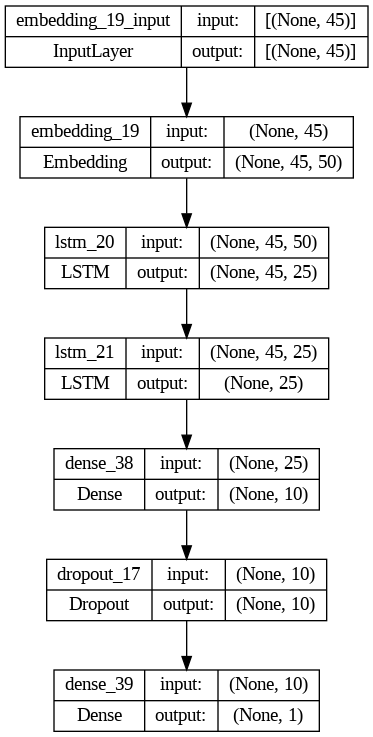

In [167]:
plot_model(LSTM_model, to_file='LSTM_model.png', show_shapes=True, show_layer_names=True)
Image(filename='LSTM_model.png')

In [168]:
# fit network
LSTM_model.fit(X_train_pad, y_train, epochs=4, batch_size=128, verbose=2, validation_split=0.1)

# save the model
# LSTM_model.save('LSTM_model.h5')

Epoch 1/4
45/45 - 12s - loss: 0.5927 - accuracy: 0.7496 - val_loss: 0.4760 - val_accuracy: 0.7492 - 12s/epoch - 257ms/step
Epoch 2/4
45/45 - 4s - loss: 0.4208 - accuracy: 0.8415 - val_loss: 0.2710 - val_accuracy: 0.8959 - 4s/epoch - 81ms/step
Epoch 3/4
45/45 - 4s - loss: 0.3245 - accuracy: 0.8949 - val_loss: 0.2588 - val_accuracy: 0.8896 - 4s/epoch - 94ms/step
Epoch 4/4
45/45 - 5s - loss: 0.2823 - accuracy: 0.9099 - val_loss: 0.2687 - val_accuracy: 0.8912 - 5s/epoch - 102ms/step


In [169]:
# LSTM model seems overfitting after the 3rd epoch, since the val_loss is increasing in further epochs.
# However the lowest val_loss is 0.2588, lower than the CNN model val_loss of 0.2692

In [171]:
LSTM_model.evaluate(X_test_pad, y_test, verbose=0)

[0.2884729504585266, 0.881313145160675]

In [126]:
# We get similar accuracy with LSTM model.